In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pyshtools as pysh
import pandas as pd
from ctplanet import pyMoho
from ctplanet import pyMohoRho
import boule as bl
from pathlib import Path

In [ ]:
PROJECT_ROOT = Path.cwd().parent
data_filename=PROJECT_ROOT/"data/density_no_mare_n3000_f3050_719.sh"
density_output=PROJECT_ROOT/"data/density_no_mare_n3000_f3050_719_DH2.txt"
result_filename=PROJECT_ROOT/"data/frequency_domain_run1.pkl"

读取数据

Wiecorek et al., 2013 的月面密度数据(没有用到)

In [ ]:
densityfile = data_filename
density = pysh.SHCoeffs.from_file(densityfile, lmax=719)
density_grid = density.expand(grid='DH2', lmax=719)
output_file = density_output
np.savetxt(output_file, density_grid.data, fmt='%.6f')

d:\conda_envs\planet\lib\site-packages\pyshtools\shclasses\shgrid.py:1464: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


(<Figure size 640x320 with 2 Axes>,
 <Axes: xlabel='Longitude', ylabel='Latitude'>)

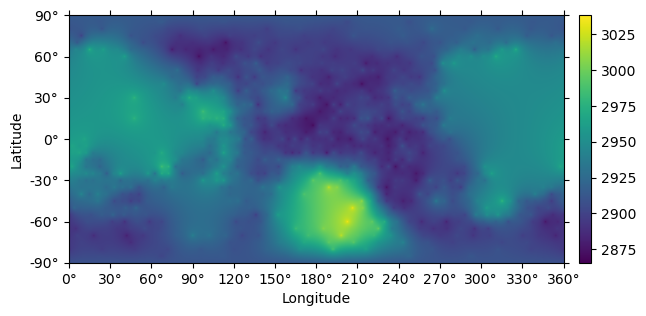

In [ ]:
density_grid.plot(colorbar='right')

重力模型GRGM1200B

GM: 4902800122445.3, R: 1738000.0, nmax: 1200


e:\Moho\cPlanteapproach\read_grav.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data=pd.read_csv(grgm1200file,skiprows=1,delim_whitespace=True,header=None,names=["l", "m", "C", "S", "dC", "dS"])


           l     m             C             S            dC            dS
0          2     0 -9.088240e-05  0.000000e+00  3.545400e-11  0.000000e+00
1          2     1  1.306224e-12  1.168978e-09  9.967550e-12  1.034075e-11
2          2     2  3.467314e-05  7.568321e-10  1.032520e-11  1.121155e-11
3          3     0 -3.197350e-06  0.000000e+00  3.203300e-12  0.000000e+00
4          3     1  2.636797e-05  5.454523e-06  3.498750e-12  3.840850e-12
...      ...   ...           ...           ...           ...           ...
721793  1200  1196 -3.726903e-10 -4.173025e-10  5.940100e-10  5.940100e-10
721794  1200  1197 -3.700728e-10 -5.588701e-10  5.940100e-10  5.940100e-10
721795  1200  1198  3.040684e-11 -4.086369e-10  5.909000e-10  5.909000e-10
721796  1200  1199 -4.635012e-10  7.171817e-10  5.924550e-10  5.924550e-10
721797  1200  1200  7.331471e-11  2.914197e-10  5.706850e-10  5.691300e-10

[721798 rows x 6 columns]
  name = None
  kind = 'real'
  normalization = '4pi'
  csphase = 1
  lma

d:\conda_envs\planet\lib\site-packages\pyshtools\shclasses\shgravcoeffs.py:2966: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


  name = None
  kind = 'real'
  normalization = '4pi'
  csphase = 1
  lmax = 1200
  GM (m3 / s2) = 4902800122445.3
  r0 (m) = 1738000.0
  omega (rad / s) = None
  error_kind = None
  header = None
  header2 = None
  epoch = None


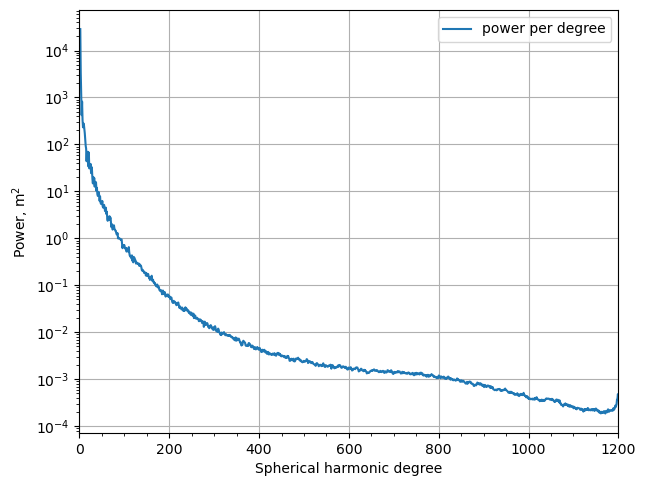

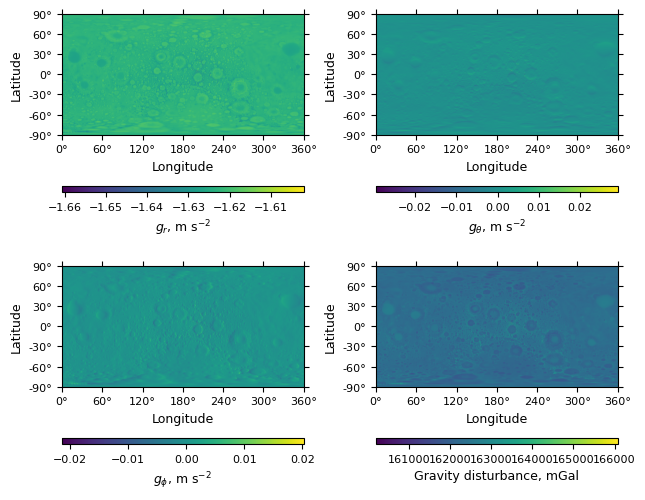

In [ ]:
pot=pysh.datasets.Moon.GRGM1200B()
pot.set_omega(bl.Moon2015.angular_velocity)
pot=pot.change_ref(gm=bl.Moon2015.geocentric_grav_const, r0=bl.Moon2015.radius)
grgm1200 = pot
print(grgm1200)

使用内置的地形数据

In [ ]:
topo = pysh.datasets.Moon.LDEM_shape_pa(lmax=1200)
topo.r0 = topo.coeffs[0, 0, 0]

设置参数

In [ ]:
thickave = 35.e3
porosity = 0.12
rho_c = 2550.0
rho_m = 3220.0
filter = 1
half = 80

执行反演程序

In [ ]:
moho = pyMoho(grgm1200, topo, 1200, rho_c, rho_m, thickave,
                filter_type=filter, half=half, lmax_calc=1200,
                quiet=False, delta_max=50.)

Maximum radius (km) = 1748.121126
Minimum radius (km) = 1728.204994
Maximum Crustal thickness (km) = 6.749761e+01
Minimum Crustal thickness (km) = -1.131708e+01
Delta (km) = 3.880788e+01
Maximum Crustal thickness (km) = 68.846309
Minimum Crustal thickness (km) = 0.041976
Iteration 1
Delta (km) = 1.940394e+01
Maximum Crustal thickness (km) = 67.982549
Minimum Crustal thickness (km) = 1.620047
Iteration 2
Delta (km) = 1.132704e+01
Maximum Crustal thickness (km) = 69.247318
Minimum Crustal thickness (km) = -2.904479
Iteration 3
Delta (km) = 5.663522e+00
Maximum Crustal thickness (km) = 68.420386
Minimum Crustal thickness (km) = 1.170813
Iteration 4
Delta (km) = 1.270196e+00
Maximum Crustal thickness (km) = 69.527764
Minimum Crustal thickness (km) = 1.589664
Iteration 5
Delta (km) = 6.350981e-01
Maximum Crustal thickness (km) = 68.974075
Minimum Crustal thickness (km) = 1.380239
Iteration 6
Delta (km) = 8.715767e-01
Maximum Crustal thickness (km) = 69.724749
Minimum Crustal thickness (km) 

In [ ]:
thick_grid = (topo.pad(1200) - moho.pad(1200)).expand(grid='DH2') / 1.e3

d:\conda_envs\planet\lib\site-packages\pyshtools\shclasses\shgrid.py:1464: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


(<Figure size 640x428.8 with 2 Axes>,
 <Axes: xlabel='Longitude', ylabel='Latitude'>)

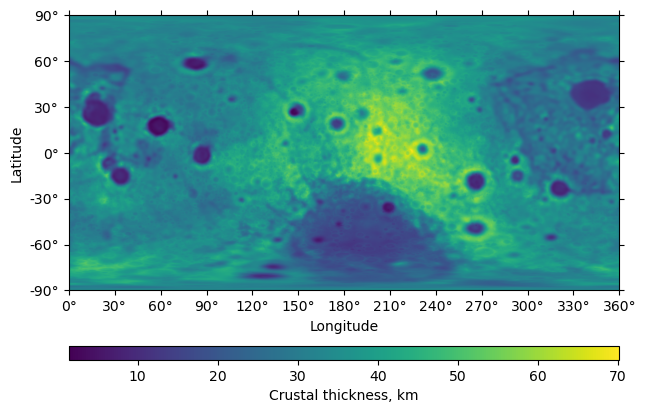

In [ ]:
thick_grid.plot(show=True, colorbar='bottom',
                    cb_label='Crustal thickness, km',
                    fname='Thick-Moon-run1.png')

In [ ]:
import pickle

pkl_name=result_filename
result={
    "moho": moho,
    "thick_grid": thick_grid,
    "topo": topo,
    "grgm1200": grgm1200,
}
with open(pkl_name, "wb") as f:
    pickle.dump(result, f)